# Udacity Machine Learning Nanodegree
--------------


## Capstone Project on Vehicle-Detection
---------------


### The goals / steps of this project are the following:

   1. ***Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier***
    
   2. ***Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.***
    
   3. ***Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.***
    
   4. ***Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
    Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.***
    
   5. ***Estimate a bounding box for vehicles detected.***


#### Imports

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
from scipy.ndimage.measurements import label

In [2]:
import pickle
%matplotlib inline

In [3]:
from scipy.ndimage.measurements import label
from collections import deque
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [4]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout, Flatten
import os

Using TensorFlow backend.


In [5]:
from keras.models import load_model
import h5py

--------

In [6]:
model = load_model('model.h5')

### 3. Vehicle detection in Image 

#### 3.1 Parameter setting

In [7]:
pickle_dict = pickle.load( open("nn_pickle.p", "rb" ) )
ystart  = 400
ystop = 656
scale = 1.5
X_scalar = pickle_dict["scalar"]
orient = pickle_dict["orient"]
pix_per_cell = pickle_dict["pix_per_cell"]
cell_per_block  = pickle_dict["cell_per_block"]
spatial_size = (32,32)
hist_bins = 32
hog_channel = "ALL"
colorspace = 'YCrCb'

##### 3.2 Application to images

In [8]:
from project.vehicle_detector_nn import findCars

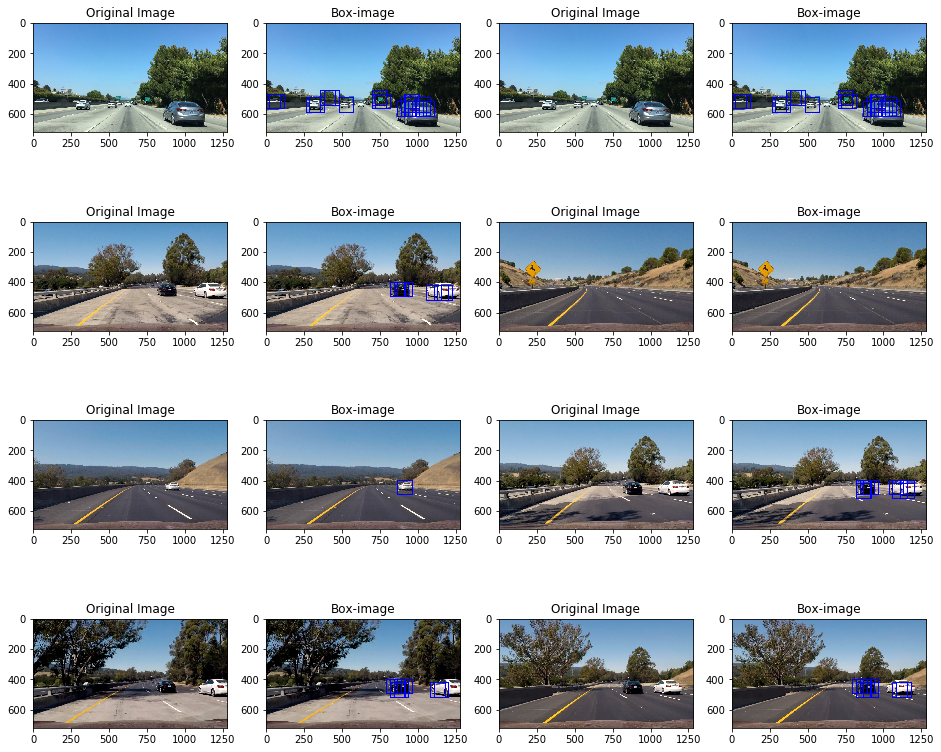

In [9]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(16,14))

n1 = 4
n2 = 4
color_space='YCrCb'
count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    
    out_img = findCars(Img, ystart, ystop, scale,\
                    model, X_scalar, color_space,\
                    orient, pix_per_cell, cell_per_block,\
                    hog_channel, spatial_size, hist_bins)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1

    
     #fig-2
    fig.add_subplot(n1,n2,count)
    plt.imshow(out_img)
    plt.title('Box-image')
    count += 1
    

----------

### 4. Vehicle Detecton Pipeline for Video

---------

In [10]:
from project.vehicle_detector_nn import DetectVehicle

In [11]:
from project.utils import draw_boxes,find_matches,plot3d

##### 4.1 Parameter setting

In [12]:
dist_pickle = pickle.load( open("nn_pickle.p", "rb" ) )
param_dict = {}
param_dict['X_scalar'] = dist_pickle["scalar"]
param_dict['orient'] = dist_pickle["orient"]
param_dict['pix_per_cell'] = dist_pickle["pix_per_cell"]
param_dict['cell_per_block']  = dist_pickle["cell_per_block"]
param_dict['spatial_size'] = (32,32)
param_dict['hist_bins'] = 32

#### 4.2 Application of heatmap

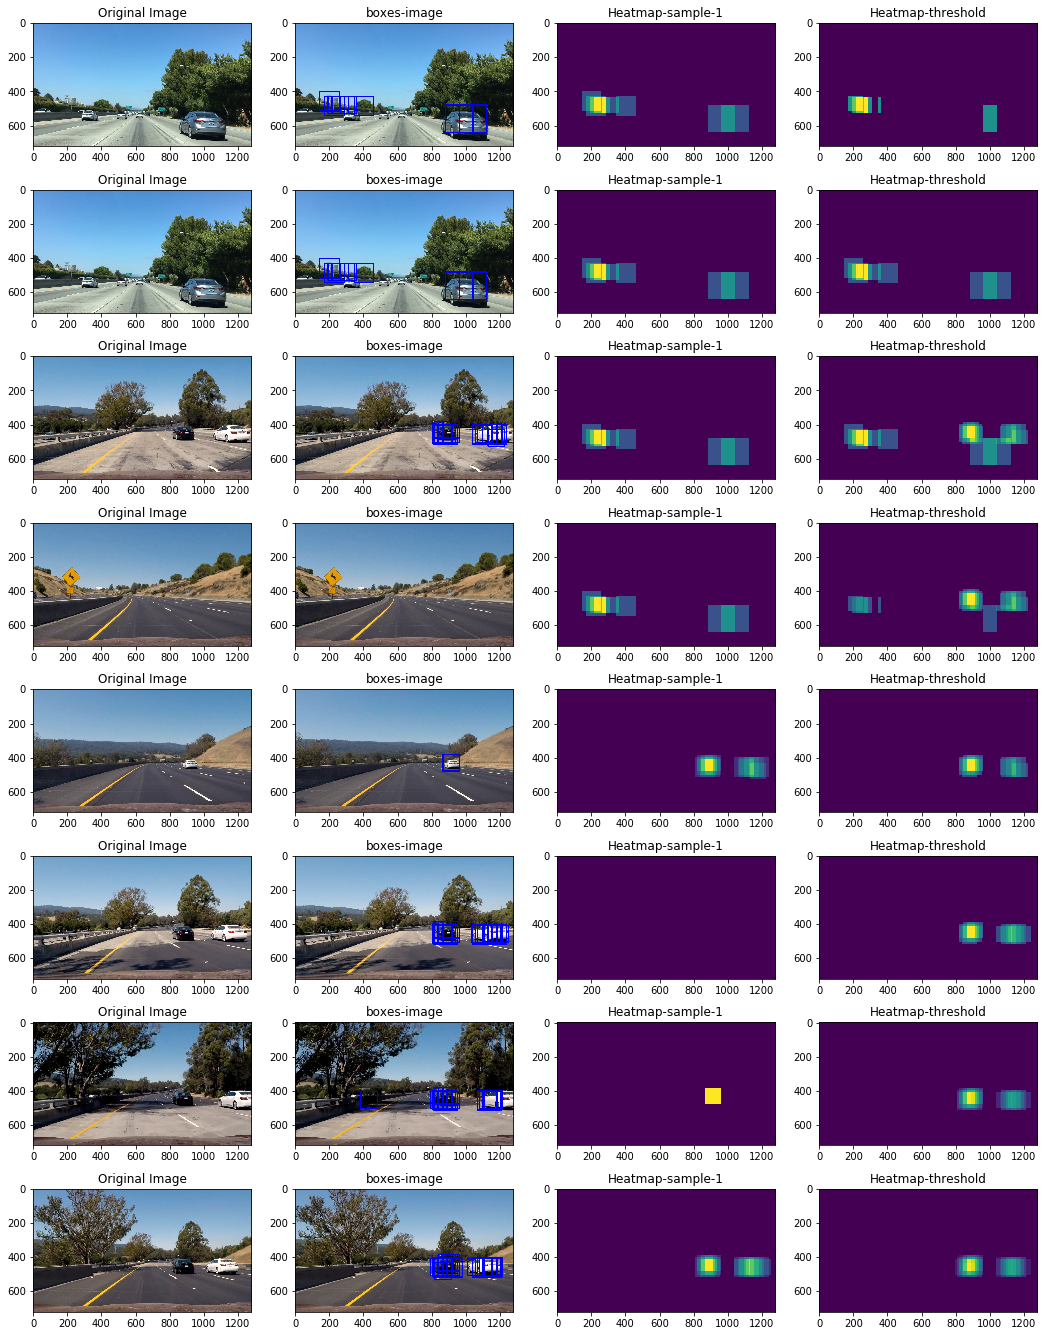

In [13]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(18,24))
DV = DetectVehicle(param_dict,model)
n1 = 8
n2 = 4

count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    boxes = DV.find_cars(Img,vid=False,vis=True)
    [draw_img_,heatmap] = DV.find_cars(Img,vid=False,vis=False)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1
   
    #fig-2
    fig.add_subplot(n1,n2,count)
    box_Img = draw_boxes(Img, boxes)
    plt.imshow(box_Img)
    plt.title('boxes-image')
    count += 1

    #fig-3
    fig.add_subplot(n1,n2,count)
    plt.imshow(DV.heat_images[0])
    plt.title('Heatmap-sample-1')
    count += 1
  
    
     #fig-5
    fig.add_subplot(n1,n2,count)
    plt.imshow(DV.heatmap)
    plt.title('Heatmap-threshold')
    count += 1
    
   

-------

#### 4.3 Application of threshold over heatmap

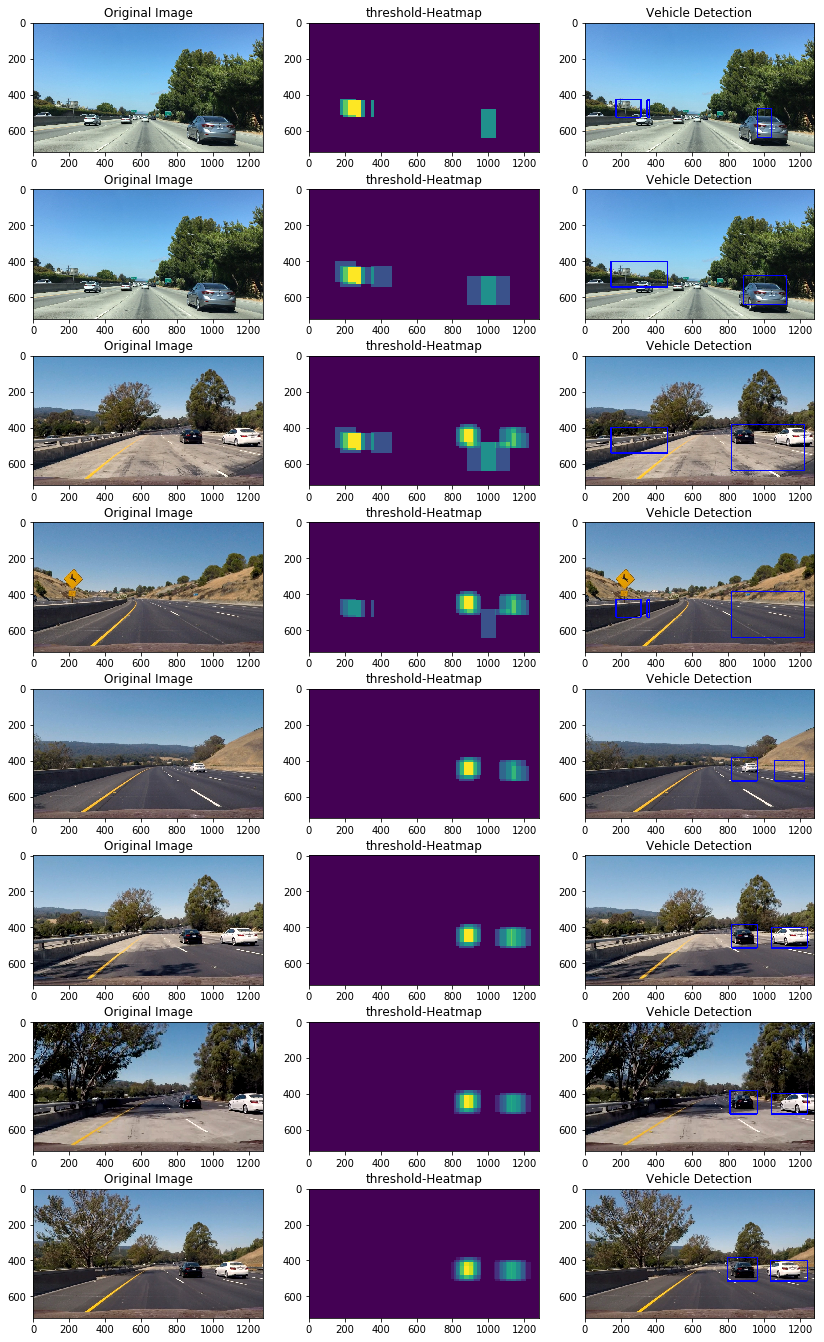

In [14]:
directory = 'test_images/*.jpg'
globDir = glob.glob(directory)
fig = plt.figure(figsize=(14,24))
DV = DetectVehicle(param_dict,model)

count = 1
for k,img in enumerate(globDir):
    Img = mpimg.imread(img)
    [draw_img,heatmap] = DV.find_cars(Img,vid=False,vis=False)
    
    #fig-1
    fig.add_subplot(8,3,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1
    
    #fig-2
    fig.add_subplot(8,3,count)
    plt.imshow(heatmap)
    plt.title('threshold-Heatmap')
    count += 1
    
    #fig-3
    fig.add_subplot(8,3,count)
    plt.imshow(draw_img)
    plt.title('Vehicle Detection')
    count += 1

-------

#### 4.4 Application to videos

##### 4.4.1 Test video

In [15]:
white_output = 'test_video_output_nn.mp4'
clip = VideoFileClip("test_video.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(DV.find_cars)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_video_output_nn.mp4
[MoviePy] Writing video test_video_output_nn.mp4


 97%|█████████▋| 38/39 [00:27<00:00,  1.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output_nn.mp4 

CPU times: user 26.4 s, sys: 2.91 s, total: 29.3 s
Wall time: 30.7 s


##### 4.4.2 Project Video

In [16]:
white_output = 'project_video_output_nn.mp4'
clip = VideoFileClip("project_video.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(DV.find_cars)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video_output_nn.mp4
[MoviePy] Writing video project_video_output_nn.mp4


100%|█████████▉| 1260/1261 [14:01<00:00,  1.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_nn.mp4 

CPU times: user 12min 55s, sys: 1min 28s, total: 14min 24s
Wall time: 14min 2s


----------

---------